### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df= application_df.drop(['EIN', 'NAME', 'STATUS','SPECIAL_CONSIDERATIONS'],1)
application_df.head()

/Users/bensalamin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION     INCOME_AMT  ASK_AMT  IS_SUCCESSFUL  
0   Association              0     5000              1  
1  Co-operative         1-9999   108590              1  
2   Association              0     5000              0  
3         Trust    10000-24999     6692              1  
4         Trust  100000-499999   142590              1

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_count=application_df.APPLICATION_TYPE.value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

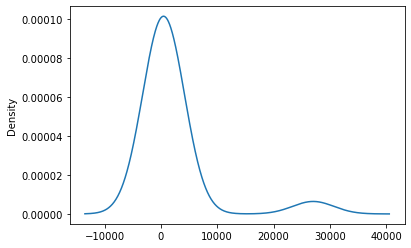

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_count[application_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

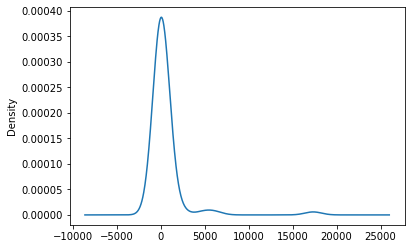

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/bensalamin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  ORGANIZATION_Trust  INCOME_AMT_0  \
0                           0.0  ...                 0.0           1.0   
1                           0.0  ...                 0.0           0.0   
2                           1.0  ...                 0.0           1.0   
3                           1.0  ...                 1.0           0.0   
4                           0.0  ...                 1.0           0.0   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  
0              0.0                0.0  
1              0.0                0.0  
2              0.0                0.0  
3              0.0                0.0  
4              0.0                0.0  

[5 rows x 39 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df= application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0     5000              1                     0.0                   1.0   
1   108590              1                     0.0                   0.0   
2     5000              0                     0.0                   0.0   
3     6692              1                     0.0                   0.0   
4   142590              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   ORGANIZATION_Trust  INCOME_AMT_0  INCOME_AMT_1-9999  \
0                 0.0           1.0                0.0   
1                 0.0           0.0                1.0   
2                 0.0           1.0                0.0   
3                 1.0           0.0                0.0   
4                 1.0           0.0                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 41 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns="IS_SUCCESSFUL")
y = application_df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_train_scaled.shape

(25724, 40)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


2022-07-10 17:33:24.614542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Define checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [19]:
# Callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 985us/step - loss: 0.5743 - accuracy: 0.7187
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7295
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7314
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7314
Epoch 5/100
789/804 [============================>.] - ETA: 0s - loss: 0.5497 - accuracy: 0.7316
Epoch 5: saving model to checkpoints/weights.05hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7311
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] 

776/804 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7397
Epoch 65: saving model to checkpoints/weights.65hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7398
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.7397
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7403
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7396
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7397
Epoch 70/100
803/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7394
Epoch 70: saving model to checkpoints/weights.70hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7395
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7395
Epoch 72/100
804/804 [=

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5557 - accuracy: 0.7264 - 398ms/epoch - 1ms/step
Loss: 0.5557006001472473, Accuracy: 0.7264139652252197


In [22]:
# Export and save model to HDF5 file
nn.save("AlphabetSoupCharity.h5")